### To predict if the horse will survive based on the data using Decision Tree and Random Forest

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)  # this displays all the columns

In [3]:
horse = pd.read_csv("horse.csv")
horse.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,extreme_pain,absent,severe,NaN,NaN,NaN,decreased,distend_large,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,mild_pain,absent,slight,NaN,NaN,NaN,absent,other,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,mild_pain,hypomotile,none,NaN,NaN,NaN,normal,normal,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,depressed,absent,severe,none,less_1_liter,5.0,decreased,NaN,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


In [4]:
horse.tail()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
294,yes,adult,533886,NaN,120.0,70.0,cold,NaN,pale_cyanotic,more_3_sec,depressed,absent,NaN,NaN,NaN,NaN,NaN,distend_large,55.0,65.0,NaN,NaN,euthanized,no,3205,0,0,no
295,no,adult,527702,37.2,72.0,24.0,cool,increased,pale_cyanotic,more_3_sec,severe_pain,hypomotile,moderate,significant,none,NaN,absent,distend_small,44.0,NaN,serosanguious,3.3,euthanized,yes,2208,0,0,yes
296,yes,adult,529386,37.5,72.0,30.0,cold,reduced,pale_cyanotic,less_3_sec,severe_pain,absent,moderate,slight,none,NaN,decreased,distend_large,60.0,6.8,NaN,NaN,died,yes,3205,0,0,no
297,yes,adult,530612,36.5,100.0,24.0,cool,reduced,pale_pink,less_3_sec,mild_pain,hypomotile,moderate,significant,none,NaN,absent,distend_small,50.0,6.0,serosanguious,3.4,lived,yes,2208,0,0,yes
298,yes,adult,534618,37.2,40.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,absent,normal,36.0,62.0,clear,1.0,euthanized,no,6112,0,0,no


In [5]:
horse.shape

(299, 28)

In [6]:
missing_rowwise = horse.isnull().sum(axis = 1)

In [7]:
horse['missing_rowise'] = missing_rowwise

In [8]:
horse[horse['missing_rowise']>13]

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,missing_rowise
17,no,adult,526639,37.5,48.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,lived,no,0,0,0,no,16
25,no,adult,529518,37.8,60.0,42.0,NaN,NaN,NaN,less_3_sec,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,lived,no,0,0,0,no,15
28,yes,adult,5279442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,died,no,4300,0,0,no,19
39,yes,young,5277409,39.2,146.0,96.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,died,yes,2113,0,0,no,16
56,yes,adult,528872,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,6.7,NaN,NaN,lived,yes,3112,0,0,no,17
72,yes,adult,5299253,37.7,56.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,died,yes,2113,0,0,no,17
74,yes,young,5292929,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.0,4.9,NaN,NaN,died,yes,11124,0,0,no,17
113,yes,adult,527933,36.8,60.0,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,died,yes,3205,0,0,yes,15
130,yes,adult,528964,37.8,30.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,died,yes,2113,0,0,no,16
173,no,adult,518476,NaN,NaN,NaN,cool,absent,dark_cyanotic,NaN,severe_pain,NaN,severe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,died,yes,3400,0,0,yes,14


In [9]:
horse = horse[horse.missing_rowise <= 13].copy()

# horse.drop(horse[horse['missing_rowise'] > 13].index, inplace=True)
# both does same

In [10]:
horse[horse['missing_rowise']>13]

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,missing_rowise


In [11]:
horse.drop(['missing_rowise'], axis = 1, inplace=True)

In [12]:
horse.tail()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
294,yes,adult,533886,NaN,120.0,70.0,cold,NaN,pale_cyanotic,more_3_sec,depressed,absent,NaN,NaN,NaN,NaN,NaN,distend_large,55.0,65.0,NaN,NaN,euthanized,no,3205,0,0,no
295,no,adult,527702,37.2,72.0,24.0,cool,increased,pale_cyanotic,more_3_sec,severe_pain,hypomotile,moderate,significant,none,NaN,absent,distend_small,44.0,NaN,serosanguious,3.3,euthanized,yes,2208,0,0,yes
296,yes,adult,529386,37.5,72.0,30.0,cold,reduced,pale_cyanotic,less_3_sec,severe_pain,absent,moderate,slight,none,NaN,decreased,distend_large,60.0,6.8,NaN,NaN,died,yes,3205,0,0,no
297,yes,adult,530612,36.5,100.0,24.0,cool,reduced,pale_pink,less_3_sec,mild_pain,hypomotile,moderate,significant,none,NaN,absent,distend_small,50.0,6.0,serosanguious,3.4,lived,yes,2208,0,0,yes
298,yes,adult,534618,37.2,40.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,absent,normal,36.0,62.0,clear,1.0,euthanized,no,6112,0,0,no


In [13]:
horse.drop(horse.index[-1], inplace=True)

In [14]:
# based on the above data, 'Outcome' column is our target variable

In [15]:
horse.shape

(279, 28)

In [16]:
horse.columns

Index(['surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen',
       'packed_cell_volume', 'total_protein', 'abdomo_appearance',
       'abdomo_protein', 'outcome', 'surgical_lesion', 'lesion_1', 'lesion_2',
       'lesion_3', 'cp_data'],
      dtype='object')

In [17]:
horse.dtypes

surgery                   object
age                       object
hospital_number            int64
rectal_temp              float64
pulse                    float64
respiratory_rate         float64
temp_of_extremities       object
peripheral_pulse          object
mucous_membrane           object
capillary_refill_time     object
pain                      object
peristalsis               object
abdominal_distention      object
nasogastric_tube          object
nasogastric_reflux        object
nasogastric_reflux_ph    float64
rectal_exam_feces         object
abdomen                   object
packed_cell_volume       float64
total_protein            float64
abdomo_appearance         object
abdomo_protein           float64
outcome                   object
surgical_lesion           object
lesion_1                   int64
lesion_2                   int64
lesion_3                   int64
cp_data                   object
dtype: object

In [18]:
horse.outcome.unique()

array(['died', 'euthanized', 'lived'], dtype=object)

<Axes: xlabel='outcome', ylabel='Count'>

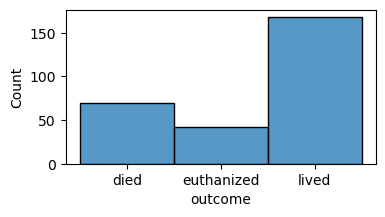

In [19]:
plt.figure(figsize=(4,2))
sns.histplot(horse.outcome)  # imbalanced data(to balance we can perform over samplingundersampling/SMOTE etc)

In [20]:
horse.outcome.isna().sum() # no null values

0

In [21]:
horse.isnull().sum()

surgery                    0
age                        0
hospital_number            0
rectal_temp               50
pulse                     15
respiratory_rate          47
temp_of_extremities       37
peripheral_pulse          51
mucous_membrane           28
capillary_refill_time     13
pain                      36
peristalsis               25
abdominal_distention      38
nasogastric_tube          84
nasogastric_reflux        86
nasogastric_reflux_ph    226
rectal_exam_feces         83
abdomen                  100
packed_cell_volume        17
total_protein             21
abdomo_appearance        147
abdomo_protein           180
outcome                    0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
dtype: int64

In [22]:
246/299

0.822742474916388

In [23]:
horse.info()

<class 'pandas.core.frame.DataFrame'>
Index: 279 entries, 0 to 297
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                279 non-null    object 
 1   age                    279 non-null    object 
 2   hospital_number        279 non-null    int64  
 3   rectal_temp            229 non-null    float64
 4   pulse                  264 non-null    float64
 5   respiratory_rate       232 non-null    float64
 6   temp_of_extremities    242 non-null    object 
 7   peripheral_pulse       228 non-null    object 
 8   mucous_membrane        251 non-null    object 
 9   capillary_refill_time  266 non-null    object 
 10  pain                   243 non-null    object 
 11  peristalsis            254 non-null    object 
 12  abdominal_distention   241 non-null    object 
 13  nasogastric_tube       195 non-null    object 
 14  nasogastric_reflux     193 non-null    object 
 15  nasogastric

#### Exploratory Data Analysis

In [24]:
horse.describe()

,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
count,2.790000e+02,229.000000,264.000000,232.000000,53.000000,262.000000,258.000000,99.000000,279.000000,279.000000,279.000000
mean,1.008428e+06,38.179039,72.325758,30.409483,4.707547,46.587786,24.605426,2.989899,3672.974910,97.017921,7.917563
std,1.432168e+06,0.734487,28.485069,17.365201,1.982311,10.411271,27.531781,1.847309,5529.505105,673.165749,132.249371
min,5.213990e+05,35.400000,36.000000,8.000000,1.000000,23.000000,3.300000,0.100000,0.000000,0.000000,0.000000
25%,5.289175e+05,37.800000,48.000000,19.500000,3.000000,39.000000,6.525000,2.000000,2111.000000,0.000000,0.000000
50%,5.303100e+05,38.200000,64.000000,25.500000,5.000000,45.000000,7.500000,2.300000,3025.000000,0.000000,0.000000
75%,5.346350e+05,38.500000,88.500000,36.000000,6.500000,52.000000,57.000000,3.900000,3209.000000,0.000000,0.000000
max,5.305129e+06,40.800000,184.000000,96.000000,7.500000,75.000000,89.000000,10.100000,41110.000000,7111.000000,2209.000000


In [25]:
# Handling the missing values

In [26]:
horse[['total_protein','abdomo_protein']] = horse[['total_protein','abdomo_protein']].fillna(horse[['total_protein','abdomo_protein']].mean())

C:\Users\Shashank Kamatagi\AppData\Local\Temp\ipykernel_15268\1185637316.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(horse.abdomo_protein)


<Axes: xlabel='abdomo_protein', ylabel='Density'>

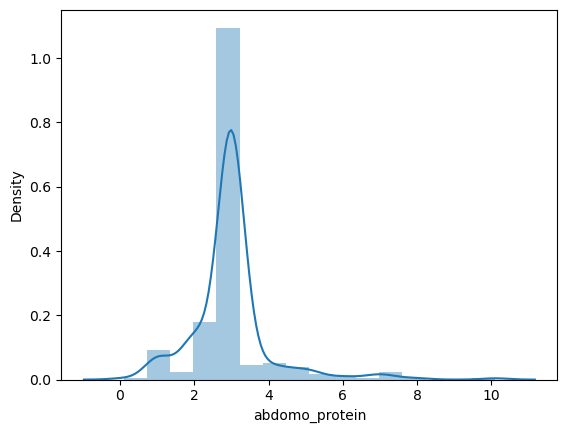

In [27]:
sns.distplot(horse.abdomo_protein)

In [28]:
horse[['rectal_temp', 'pulse', 'respiratory_rate']] = horse[['rectal_temp', 'pulse', 'respiratory_rate']].fillna(horse[['rectal_temp', 'pulse', 'respiratory_rate']].mean())

In [29]:
horse['nasogastric_reflux_ph'] = horse['nasogastric_reflux_ph'].fillna(horse['nasogastric_reflux_ph'].mean())

In [30]:
horse['packed_cell_volume'] = horse['packed_cell_volume'].fillna(horse['packed_cell_volume'].mean())

C:\Users\Shashank Kamatagi\AppData\Local\Temp\ipykernel_15268\927619218.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(horse.total_protein)


<Axes: xlabel='total_protein', ylabel='Density'>

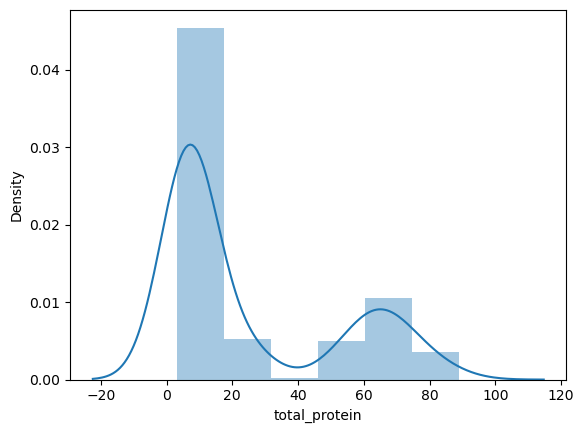

In [31]:
sns.distplot(horse.total_protein)

In [32]:
horse.nasogastric_reflux_ph.isnull().sum()

0

<Axes: xlabel='nasogastric_reflux_ph', ylabel='Count'>

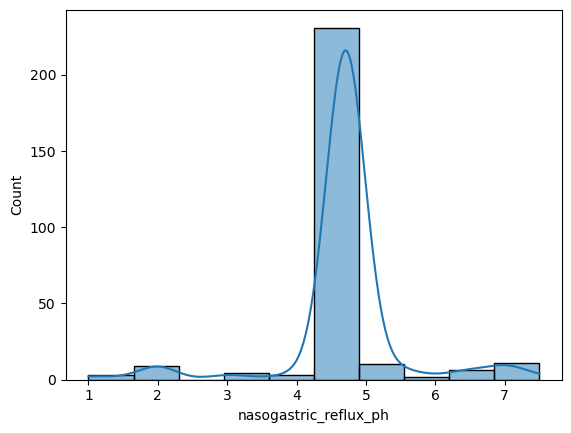

In [33]:
sns.histplot(horse.nasogastric_reflux_ph, kde=True)

In [34]:
# the above column has significant proportion of missing values, hence dropping the column
horse.drop(['nasogastric_reflux_ph'], axis = 1, inplace=True)

In [35]:
horse.describe()

,hospital_number,rectal_temp,pulse,respiratory_rate,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
count,2.790000e+02,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000
mean,1.008428e+06,38.179039,72.325758,30.409483,46.587786,24.605426,2.989899,3672.974910,97.017921,7.917563
std,1.432168e+06,0.665165,27.705932,15.829362,10.087919,26.471495,1.096807,5529.505105,673.165749,132.249371
min,5.213990e+05,35.400000,36.000000,8.000000,23.000000,3.300000,0.100000,0.000000,0.000000,0.000000
25%,5.289175e+05,37.900000,48.000000,20.000000,39.000000,6.600000,2.989899,2111.000000,0.000000,0.000000
50%,5.303100e+05,38.179039,66.000000,30.000000,46.000000,7.600000,2.989899,3025.000000,0.000000,0.000000
75%,5.346350e+05,38.500000,88.000000,35.500000,51.500000,55.000000,2.989899,3209.000000,0.000000,0.000000
max,5.305129e+06,40.800000,184.000000,96.000000,75.000000,89.000000,10.100000,41110.000000,7111.000000,2209.000000


In [36]:
horse.peripheral_pulse.value_counts()

peripheral_pulse
normal       114
reduced      102
absent         7
increased      5
Name: count, dtype: int64

In [37]:
horse['peripheral_pulse'] = horse['peripheral_pulse'].fillna(method = 'ffill')

In [38]:
horse.peripheral_pulse.value_counts()

peripheral_pulse
normal       143
reduced      122
absent         9
increased      5
Name: count, dtype: int64

In [39]:
horse['mucous_membrane'].value_counts()

mucous_membrane
normal_pink      79
pale_pink        57
pale_cyanotic    41
bright_pink      30
bright_red       25
dark_cyanotic    19
Name: count, dtype: int64

In [40]:
horse['mucous_membrane'] = horse['mucous_membrane'].fillna(method = 'bfill')

In [41]:
horse['mucous_membrane'].value_counts()

mucous_membrane
normal_pink      90
pale_pink        65
pale_cyanotic    45
bright_pink      32
bright_red       26
dark_cyanotic    21
Name: count, dtype: int64

In [42]:
horse.describe()

,hospital_number,rectal_temp,pulse,respiratory_rate,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
count,2.790000e+02,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000
mean,1.008428e+06,38.179039,72.325758,30.409483,46.587786,24.605426,2.989899,3672.974910,97.017921,7.917563
std,1.432168e+06,0.665165,27.705932,15.829362,10.087919,26.471495,1.096807,5529.505105,673.165749,132.249371
min,5.213990e+05,35.400000,36.000000,8.000000,23.000000,3.300000,0.100000,0.000000,0.000000,0.000000
25%,5.289175e+05,37.900000,48.000000,20.000000,39.000000,6.600000,2.989899,2111.000000,0.000000,0.000000
50%,5.303100e+05,38.179039,66.000000,30.000000,46.000000,7.600000,2.989899,3025.000000,0.000000,0.000000
75%,5.346350e+05,38.500000,88.000000,35.500000,51.500000,55.000000,2.989899,3209.000000,0.000000,0.000000
max,5.305129e+06,40.800000,184.000000,96.000000,75.000000,89.000000,10.100000,41110.000000,7111.000000,2209.000000


In [43]:
horse.groupby(['outcome','temp_of_extremities']).count()

surgery  age  hospital_number  rectal_temp  \
outcome    temp_of_extremities                                               
died       cold                       9    9                9            9   
           cool                      40   40               40           40   
           normal                    11   11               11           11   
           warm                       3    3                3            3   
euthanized cold                       7    7                7            7   
           cool                      21   21               21           21   
           normal                     4    4                4            4   
           warm                       1    1                1            1   
lived      cold                      11   11               11           11   
           cool                      46   46               46           46   
           normal                    63   63               63           63   
           warm                      26   26               26           26   

                                pulse  respiratory_rate  peripheral_pulse  \
outcome    temp_of_extremities                                              
died       cold                     9                 9                 9   
           cool                    40                40                40   
           normal                  11                11                11   
           warm                     3                 3                 3   
euthanized cold                     7                 7                 7   
           cool                    21                21                21   
           normal                   4                 4                 4   
           warm                     1                 1                 1   
lived      cold                    11                11                11   
           cool                    46                46                46   
           normal                  63                63                63   
           warm                    26                26                26   

                                mucous_membrane  capillary_refill_time  pain  \
outcome    temp_of_extremities                                                 
died       cold                               9                      8     9   
           cool                              40                     39    38   
           normal                            11                     11    11   
           warm                               3                      3     3   
euthanized cold                               7                      7     7   
           cool                              21                     21    19   
           normal                             4                      4     3   
           warm                               1                      1     1   
lived      cold                              11                     10     7   
           cool                              46                     44    41   
           normal                            63                     63    59   
           warm                              26                     25    24   

                                peristalsis  abdominal_distention  \
outcome    temp_of_extremities                                      
died       cold                           9                     9   
           cool                          38                    38   
           normal                        11                    11   
           warm                           2                     2   
euthanized cold                           7                     4   
           cool                          19                    18   
           normal                         4                     3   
           warm                           1                     1   
lived      cold                          11      

In [44]:
horse[['outcome','temp_of_extremities']].value_counts()

outcome     temp_of_extremities
lived       normal                 63
            cool                   46
died        cool                   40
lived       warm                   26
euthanized  cool                   21
died        normal                 11
lived       cold                   11
died        cold                    9
euthanized  cold                    7
            normal                  4
died        warm                    3
euthanized  warm                    1
Name: count, dtype: int64

<Axes: xlabel='temp_of_extremities', ylabel='Count'>

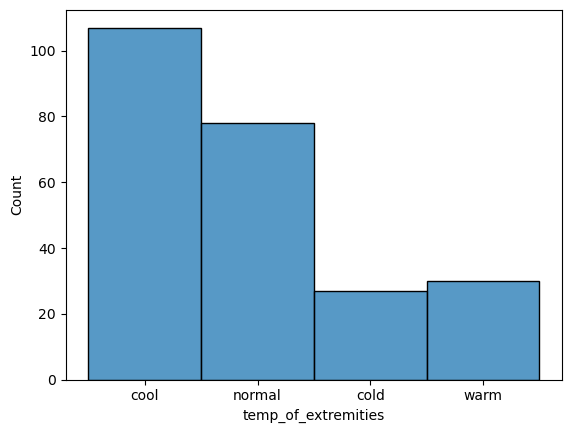

In [45]:
sns.histplot(horse.temp_of_extremities)

In [46]:
horse['temp_of_extremities'] = horse['temp_of_extremities'].fillna(method='ffill')
# using forward fill, and as we can see below, filled proportionately

<Axes: xlabel='temp_of_extremities', ylabel='Count'>

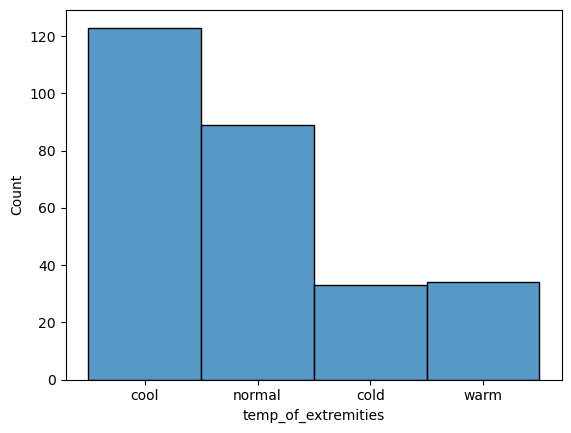

In [47]:
sns.histplot(horse['temp_of_extremities'])

In [48]:
horse.capillary_refill_time.value_counts()

capillary_refill_time
less_3_sec    186
more_3_sec     78
3               2
Name: count, dtype: int64

In [49]:
horse['capillary_refill_time'] = horse['capillary_refill_time'].fillna(horse['capillary_refill_time'].mode()[0])

In [50]:
horse.pain.value_counts()

pain
mild_pain       67
depressed       59
extreme_pain    42
alert           38
severe_pain     37
Name: count, dtype: int64

In [51]:
horse['pain'] = horse['pain'].fillna(method='ffill')

In [52]:
horse.pain.value_counts()

pain
mild_pain       75
depressed       69
extreme_pain    48
severe_pain     44
alert           43
Name: count, dtype: int64

In [53]:
horse['peristalsis'].value_counts()

peristalsis
hypomotile     127
absent          72
hypermotile     39
normal          16
Name: count, dtype: int64

In [54]:
horse.abdominal_distention.value_counts()

abdominal_distention
none        75
slight      65
moderate    65
severe      36
Name: count, dtype: int64

In [55]:
horse['nasogastric_tube'].value_counts()

nasogastric_tube
slight         101
none            71
significant     23
Name: count, dtype: int64

In [56]:
horse['nasogastric_reflux'].value_counts()

nasogastric_reflux
none            119
more_1_liter     39
less_1_liter     35
Name: count, dtype: int64

In [57]:
horse['rectal_exam_feces'].value_counts()

rectal_exam_feces
absent       78
normal       57
decreased    48
increased    13
Name: count, dtype: int64

In [58]:
horse['abdomen'].value_counts()

abdomen
distend_large    77
distend_small    43
normal           27
other            19
firm             13
Name: count, dtype: int64

In [59]:
horse['abdomo_appearance'].value_counts()

abdomo_appearance
cloudy           46
serosanguious    46
clear            40
Name: count, dtype: int64

In [60]:
horse[['nasogastric_reflux','peristalsis','abdominal_distention','nasogastric_tube','rectal_exam_feces','abdomen','abdomo_appearance']] = horse[['nasogastric_reflux','peristalsis','abdominal_distention','nasogastric_tube','rectal_exam_feces','abdomen','abdomo_appearance']].fillna(method='ffill')

In [61]:
horse[['nasogastric_tube','nasogastric_reflux','abdomo_appearance']] = horse[['nasogastric_tube','nasogastric_reflux','abdomo_appearance']].fillna(method = 'bfill')

In [62]:
horse.isnull().sum()

surgery                  0
age                      0
hospital_number          0
rectal_temp              0
pulse                    0
respiratory_rate         0
temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          0
capillary_refill_time    0
pain                     0
peristalsis              0
abdominal_distention     0
nasogastric_tube         0
nasogastric_reflux       0
rectal_exam_feces        0
abdomen                  0
packed_cell_volume       0
total_protein            0
abdomo_appearance        0
abdomo_protein           0
outcome                  0
surgical_lesion          0
lesion_1                 0
lesion_2                 0
lesion_3                 0
cp_data                  0
dtype: int64

In [63]:
horse.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,pale_cyanotic,more_3_sec,extreme_pain,absent,severe,none,less_1_liter,decreased,distend_large,45.0,8.4,cloudy,2.989899,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,cool,reduced,pale_cyanotic,less_3_sec,mild_pain,absent,slight,none,less_1_liter,absent,other,50.0,85.0,cloudy,2.000000,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,mild_pain,hypomotile,none,none,less_1_liter,normal,normal,33.0,6.7,cloudy,2.989899,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,depressed,absent,severe,none,less_1_liter,decreased,normal,48.0,7.2,serosanguious,5.300000,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,cold,normal,dark_cyanotic,more_3_sec,depressed,absent,severe,none,less_1_liter,decreased,normal,74.0,7.4,serosanguious,2.989899,died,no,4300,0,0,no


In [64]:
# As decision tree classifier is not sensitive to outliers, we can skip outlier treatment

In [65]:
# Target variable
target = horse['outcome']

In [66]:
target.shape

(279,)

In [67]:
horse = horse.drop(['outcome'], axis = 1)

In [68]:
horse.shape

(279, 26)

In [69]:
horse.columns

Index(['surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'rectal_exam_feces', 'abdomen', 'packed_cell_volume', 'total_protein',
       'abdomo_appearance', 'abdomo_protein', 'surgical_lesion', 'lesion_1',
       'lesion_2', 'lesion_3', 'cp_data'],
      dtype='object')

In [70]:
horse.dtypes

surgery                   object
age                       object
hospital_number            int64
rectal_temp              float64
pulse                    float64
respiratory_rate         float64
temp_of_extremities       object
peripheral_pulse          object
mucous_membrane           object
capillary_refill_time     object
pain                      object
peristalsis               object
abdominal_distention      object
nasogastric_tube          object
nasogastric_reflux        object
rectal_exam_feces         object
abdomen                   object
packed_cell_volume       float64
total_protein            float64
abdomo_appearance         object
abdomo_protein           float64
surgical_lesion           object
lesion_1                   int64
lesion_2                   int64
lesion_3                   int64
cp_data                   object
dtype: object

In [71]:
#taking only categorical variables and producing dummies

categorical_variables = ['surgery','age','temp_of_extremities','peripheral_pulse','mucous_membrane','capillary_refill_time',
                         'pain', 'peristalsis','abdominal_distention','nasogastric_tube','nasogastric_reflux',
                         'rectal_exam_feces','abdomen','abdomo_appearance','surgical_lesion','cp_data']

In [72]:
len(categorical_variables)

16

In [73]:
for category in categorical_variables:
    horse = pd.get_dummies(data = horse, columns=[category], drop_first=True, dtype='int')

In [74]:
horse

,hospital_number,rectal_temp,pulse,respiratory_rate,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3,surgery_yes,age_young,temp_of_extremities_cool,temp_of_extremities_normal,temp_of_extremities_warm,peripheral_pulse_increased,peripheral_pulse_normal,peripheral_pulse_reduced,mucous_membrane_bright_red,mucous_membrane_dark_cyanotic,mucous_membrane_normal_pink,mucous_membrane_pale_cyanotic,mucous_membrane_pale_pink,capillary_refill_time_less_3_sec,capillary_refill_time_more_3_sec,pain_depressed,pain_extreme_pain,pain_mild_pain,pain_severe_pain,peristalsis_hypermotile,peristalsis_hypomotile,peristalsis_normal,abdominal_distention_none,abdominal_distention_severe,abdominal_distention_slight,nasogastric_tube_significant,nasogastric_tube_slight,nasogastric_reflux_more_1_liter,nasogastric_reflux_none,rectal_exam_feces_decreased,rectal_exam_feces_increased,rectal_exam_feces_normal,abdomen_distend_small,abdomen_firm,abdomen_normal,abdomen_other,abdomo_appearance_cloudy,abdomo_appearance_serosanguious,surgical_lesion_yes,cp_data_yes
0,530101,38.500000,66.0,28.0,45.0,8.400000,2.989899,11300,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1,534817,39.200000,88.0,20.0,50.0,85.000000,2.000000,2208,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
2,530334,38.300000,40.0,24.0,33.0,6.700000,2.989899,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1
3,5290409,39.100000,164.0,84.0,48.0,7.200000,5.300000,2208,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,1
4,530255,37.300000,104.0,35.0,74.0,7.400000,2.989899,4300,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,533902,38.500000,40.0,16.0,37.0,67.000000,2.989899,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,1,1,0,0,0
294,533886,38.179039,120.0,70.0,55.0,65.000000,2.989899,3205,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0
295,527702,37.200000,72.0,24.0,44.0,24.605426,3.300000,2208,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,1,1
296,529386,37.500000,72.0,30.0,60.0,6.800000,2.989899,3205,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,1,0


In [75]:
feature_cols = horse.columns

In [76]:
feature_cols

Index(['hospital_number', 'rectal_temp', 'pulse', 'respiratory_rate',
       'packed_cell_volume', 'total_protein', 'abdomo_protein', 'lesion_1',
       'lesion_2', 'lesion_3', 'surgery_yes', 'age_young',
       'temp_of_extremities_cool', 'temp_of_extremities_normal',
       'temp_of_extremities_warm', 'peripheral_pulse_increased',
       'peripheral_pulse_normal', 'peripheral_pulse_reduced',
       'mucous_membrane_bright_red', 'mucous_membrane_dark_cyanotic',
       'mucous_membrane_normal_pink', 'mucous_membrane_pale_cyanotic',
       'mucous_membrane_pale_pink', 'capillary_refill_time_less_3_sec',
       'capillary_refill_time_more_3_sec', 'pain_depressed',
       'pain_extreme_pain', 'pain_mild_pain', 'pain_severe_pain',
       'peristalsis_hypermotile', 'peristalsis_hypomotile',
       'peristalsis_normal', 'abdominal_distention_none',
       'abdominal_distention_severe', 'abdominal_distention_slight',
       'nasogastric_tube_significant', 'nasogastric_tube_slight',
       'na

##### Traing the model

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [78]:
#converting the variables into array for the sake of label encoding

X,y = horse.values, target.values

In [79]:
# as we have already one hot encoding to inputs, now doing Label encoding for target

label_encode = LabelEncoder()
y = label_encode.fit_transform(y)

In [80]:
X.shape, y.shape

((279, 50), (279,))

In [81]:
#train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=31)

In [82]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(209, 50)
(209,)
(70, 50)
(70,)


In [83]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [84]:
# by default hyperparameters
dtclassifier = DecisionTreeClassifier()

In [85]:
dtclassifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [86]:
y_pred = dtclassifier.predict(X_test)

In [87]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

###### Evaluation without Hyperparameter tuning

In [88]:
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred),"\n")
print("Test Accuracy:",accuracy_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.81      0.60        16
           1       0.50      0.15      0.24        13
           2       0.74      0.71      0.72        41

    accuracy                           0.63        70
   macro avg       0.58      0.56      0.52        70
weighted avg       0.64      0.63      0.61        70

Confusion Matrix:
[[13  0  3]
 [ 4  2  7]
 [10  2 29]] 

Test Accuracy: 0.6285714285714286


In [89]:
# accuracy of the train data set
y_train_pred = dtclassifier.predict(X_train)
accuracy_score(y_train_pred, y_train)

1.0

#### Hyperparameter Tuning

In [90]:
from sklearn.model_selection import GridSearchCV

In [91]:
param_grid = {'criterion':['gini','entropy'],
              'max_depth':[3,5,8,10,12],
             'min_samples_split':[2,3,5,7,8],
             }

In [92]:
grid = GridSearchCV(dtclassifier, param_grid=param_grid, cv = 3, scoring='accuracy')

In [93]:
grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 8, 10, 12],
                         'min_samples_split': [2, 3, 5, 7, 8]},
             scoring='accuracy')

In [94]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 3}

In [95]:
# Tuned hyperparameters
#testing with the above tuned params

dtunedclassifier = DecisionTreeClassifier(criterion ='entropy', max_depth= 10, min_samples_split= 3)

In [96]:
dtunedclassifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=3)

In [97]:
y_predict = dtunedclassifier.predict(X_test)

In [98]:
print("Classification Report:")
print(classification_report(y_test, y_predict))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_predict),"\n")
print("Test Accuracy:",accuracy_score(y_test, y_predict))

Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.62      0.57        16
           1       0.25      0.15      0.19        13
           2       0.72      0.76      0.74        41

    accuracy                           0.61        70
   macro avg       0.50      0.51      0.50        70
weighted avg       0.59      0.61      0.60        70

Confusion Matrix:
[[10  0  6]
 [ 5  2  6]
 [ 4  6 31]] 

Test Accuracy: 0.6142857142857143


In [99]:
# Please note that the accuracy has increased by around 5 percent after hyperparameter tuning

### Random Forest

In [100]:
from sklearn.ensemble import RandomForestClassifier

In [101]:
# Without hyperparameter tuning
rfclassifier = RandomForestClassifier()

In [102]:
rfclassifier.fit(X_train, y_train)

RandomForestClassifier()

In [103]:
yf_pred = rfclassifier.predict(X_test)

###### Without tuning

In [104]:
print("Classification Report:")
print(classification_report(y_test, yf_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, yf_pred),"\n")
print("Test Accuracy:",accuracy_score(y_test, yf_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.62      0.67        16
           1       0.33      0.08      0.12        13
           2       0.70      0.90      0.79        41

    accuracy                           0.69        70
   macro avg       0.58      0.53      0.53        70
weighted avg       0.63      0.69      0.64        70

Confusion Matrix:
[[10  0  6]
 [ 2  1 10]
 [ 2  2 37]] 

Test Accuracy: 0.6857142857142857


###### Tuning

In [105]:
p_grid = {'n_estimators':[20,50,75,100],
         'criterion':['gini','entropy'],
         'max_depth':[3,5,9,12],
         'min_samples_split':[2,4,5,7]
         }

In [106]:
fgrid = GridSearchCV(rfclassifier, param_grid=p_grid, cv = 4, scoring='accuracy')

In [107]:
fgrid.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 9, 12],
                         'min_samples_split': [2, 4, 5, 7],
                         'n_estimators': [20, 50, 75, 100]},
             scoring='accuracy')

In [108]:
fgrid.best_params_

{'criterion': 'entropy',
 'max_depth': 12,
 'min_samples_split': 4,
 'n_estimators': 50}

In [109]:
rftunedclassifier = RandomForestClassifier(n_estimators=50, criterion='entropy',max_depth=12,min_samples_split=4)

In [110]:
rftunedclassifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=12, min_samples_split=4,
                       n_estimators=50)

In [111]:
yft_pred = rftunedclassifier.predict(X_test)

###### WIth tuning

In [112]:
print("Classification Report:")
print(classification_report(y_test, yft_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, yft_pred),"\n")
print("Test Accuracy:",accuracy_score(y_test, yft_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.75      0.69        16
           1       0.33      0.08      0.12        13
           2       0.77      0.90      0.83        41

    accuracy                           0.71        70
   macro avg       0.58      0.58      0.55        70
weighted avg       0.66      0.71      0.67        70

Confusion Matrix:
[[12  0  4]
 [ 5  1  7]
 [ 2  2 37]] 

Test Accuracy: 0.7142857142857143


#### Deployment

In [113]:
import joblib

In [114]:
with open('random_forest_model.pkl', 'wb') as model_file:
    joblib.dump(rftunedclassifier, model_file)

In [115]:
import os

In [116]:
os.listdir()

['.ipynb_checkpoints',
 'horse.csv',
 'Horse_survival_DT_RF.ipynb',
 'random_forest_model.pkl']

In [117]:
with open('random_forest_model.pkl', 'rb') as model_file:
    loaded_model = joblib.load(model_file)

###### Comparing the actual vs predicted data

In [118]:
r1 = pd.DataFrame(yft_pred, columns=['Predicted'])
r1['Actual'] = pd.Series(y_train)
X_train = pd.DataFrame(X_train)
r1 = pd.concat([X_train, r1], axis = 1)

In [119]:
r1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,Predicted,Actual
0,534756.0,37.300000,40.0,30.409483,36.000000,24.605426,2.000000,3111.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,2.0
1,527709.0,38.000000,108.0,60.000000,46.587786,24.605426,2.989899,2205.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,2.0
2,535338.0,37.800000,88.0,80.000000,64.000000,89.000000,2.989899,3205.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0
3,530319.0,38.179039,84.0,36.000000,44.000000,8.500000,2.989899,3111.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,2.0,2.0
4,528548.0,38.100000,66.0,12.000000,44.000000,6.000000,3.600000,2124.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,2.0,2.0


In [120]:
r1[r1['Predicted']!=r1['Actual']]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,Predicted,Actual
2,535338.0,37.800000,88.0,80.000000,64.0,89.0,2.989899,3205.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0
5,533871.0,37.500000,72.0,30.409483,35.0,65.0,2.000000,7209.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,1.0
7,533928.0,37.800000,60.0,24.000000,52.0,75.0,2.989899,2205.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0
10,528006.0,38.179039,40.0,16.000000,50.0,7.0,3.900000,2208.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
15,534998.0,38.300000,130.0,60.000000,50.0,70.0,2.989899,3111.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,530431.0,38.300000,42.0,24.000000,40.0,8.5,2.989899,7113.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,NaN,NaN
205,530381.0,38.179039,70.0,36.000000,36.0,7.3,2.989899,31110.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN
206,5301219.0,38.179039,128.0,36.000000,53.0,7.8,4.700000,1400.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,NaN,NaN
207,528729.0,37.500000,48.0,30.000000,48.0,8.6,2.989899,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN


In [121]:
r2 = pd.DataFrame(yft_pred, columns=['Predicted'])
r2['Actual'] = pd.Series(y_test)
X_test = pd.DataFrame(X_test)
r2 = pd.concat([X_test, r2], axis = 1)

In [122]:
r2[r2['Actual']!=r2['Predicted']]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,Predicted,Actual
6,528812.0,38.179039,104.000000,24.000000,73.000000,8.4,2.989899,7111.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0,1
7,533942.0,38.000000,66.000000,20.000000,46.000000,46.0,2.000000,6209.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2,1
9,535043.0,39.300000,100.000000,51.000000,66.000000,13.0,2.000000,2113.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2,1
14,534787.0,38.000000,36.000000,16.000000,37.000000,75.0,1.000000,3111.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2,1
19,529493.0,38.300000,112.000000,16.000000,51.000000,6.0,1.000000,5205.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,1
20,530051.0,38.179039,80.000000,36.000000,38.000000,6.2,2.989899,3205.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0,1
21,530693.0,38.179039,72.325758,30.409483,46.000000,5.9,2.989899,3025.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2,0
27,5294539.0,38.800000,184.000000,84.000000,33.000000,3.3,2.989899,7111.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2,0
32,533968.0,38.179039,60.000000,30.000000,45.000000,70.0,2.000000,6111.0,3111.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1,2
35,534073.0,37.500000,48.000000,40.000000,41.000000,55.0,2.000000,2208.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2,1


In [123]:
r2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,Predicted,Actual
0,527957.0,38.5,60.000000,30.409483,44.0,7.7,2.989899,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2,2
1,534491.0,38.0,60.000000,32.000000,50.0,7.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2,2
2,529528.0,39.2,72.325758,23.000000,36.0,6.6,3.000000,3115.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,2,2
3,534478.0,37.5,44.000000,10.000000,43.0,51.0,1.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2
4,5283431.0,38.5,66.000000,24.000000,40.0,6.7,2.989899,31110.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,534556.0,38.3,80.000000,40.000000,67.0,10.2,1.000000,2208.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2,1
66,535130.0,38.2,60.000000,30.000000,48.0,66.0,2.989899,6112.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,2,2
67,528461.0,38.0,42.000000,68.000000,41.0,7.6,2.989899,2205.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2,2
68,529667.0,39.0,64.000000,36.000000,44.0,7.5,5.000000,2113.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2,2
